# RANDOM FOREST

# LOAD THE DEPENDANCIES

## Pandas

In [82]:
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix

## Numpy

In [83]:
import numpy as np
from numpy import set_printoptions

## Matplotlib & Seaborn

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
import graphviz

## sklearn

In [85]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA 
from sklearn.manifold import Isomap

## Math & statistics

In [86]:
from scipy import stats
from scipy.stats import norm
import math

## System

In [87]:
import os
import sys
import pprint
sys.path.insert(0, "C:\\Users\\Crystal\\Desktop\\Programs\\my-modules-and-libraries")
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

## notebook widgets

In [88]:
import ipywidgets as widgets
from IPython.display import Image
from IPython.display import display, Math, Latex
from IPython.core.interactiveshell import InteractiveShell  
# InteractiveShell.ast_node_interactivity = "all"

# FUNCTIONS

## label Encoding

In [89]:
def label_encoding(dataset,input_headers):
    
    for i in input_headers:
        
        the_data_type=dataset[i].dtype.name
        if (the_data_type=='object'):
            lable_enc=preprocessing.LabelEncoder()
            lable_enc.fit(dataset[i])
            labels=lable_enc.classes_   #this is an array
            labels=list(labels) #converting the labels array to a list
            print(labels)
            dataset[i]=lable_enc.transform(dataset[i])

            return labels
    
        else:
            c=list(np.unique(dataset[i]))
            return [str(x) for x in c]

## Feature Scaling

In [90]:
def feature_scaling(X_train,X_test):
    sc_X=StandardScaler()
    X_train=sc_X.fit_transform(X=X_train,y=None)
    X_test=sc_X.fit_transform(X=X_test,y=None)

    print(sc_X.fit(X_train))
    print(X_train[0:5])
    
    
    
    return X_train, X_test

## Visualization

### Plot the data space (scatter)

In [91]:
def plot_of_data_space(dataset,data,labels,input_headers):
    
    
    xx_1=pd.DataFrame(data[:,0]) 
    xx_2=pd.DataFrame(data[:,1]) 
    y=pd.DataFrame(labels)
    
   
    plt.figure(figsize=(15,10)) 
    b=plt.scatter(xx_1[y==0],xx_2[y==0],color='b') 
    r=plt.scatter(xx_1[y==1],xx_2[y==1],color='r')
    g=plt.scatter(xx_1[y==2],xx_2[y==2],color='g') 
    bl=plt.scatter(xx_1[y==3],xx_2[y==3],color='black')
    

    plt.xlabel(input_headers[0])
    plt.ylabel(input_headers[1])

    plt.grid(b=True)
    plt.legend((b,r,g,bl),tuple(np.unique(labels)))
    plt.show()


### Feature Distributions (histograms)

In [92]:
def feature_distributions(df,target_header,*args):
    
    data=df.drop(target_header,axis=1,inplace=False)

    num_plot_rows=len(data.columns)

    print (classes)
    
    label_encoder = preprocessing.LabelEncoder()
    df[target_header]=label_encoder.fit_transform(df[target_header])
    labels=label_encoder.classes_   #this is an array
    labels=list(labels) #converting the labels array to a list
    print (labels)

    fig = plt.figure(figsize = (20,num_plot_rows*4))
    j = 0

    ax=[]
    colors=['b','r','g','black']
    for i in data.columns:
        plt.subplot(num_plot_rows, 4, j+1)
        j += 1
        for k in range(len(labels)):
    #         print(k)
            a=sns.distplot(data[i][df[target_header]==k], color=colors[k], label = str(labels[k])+classes[k]);
            ax.append(a)
        plt.legend(loc='best')
    
    fig.suptitle(target_header+ ' Data Analysis')
    fig.tight_layout()
    # fig.subplots_adjust(top=0.95)
    plt.show()

## Preprocessing: Splitting the dataset

In [93]:
def split_the_dataset(dataset,input_headers,target_header):
    
    X=dataset[input_headers]
    y=dataset[target_header]
    
    X.head()
    
    return X,y

## Replacing Zeros

In [94]:
def replacing_zeros(dataset,the_headers):
    """Function used to remove zeros from numeric features when 0 is not practical"""

    for header in the_headers:
        dataset[header]=dataset[header].replace(0,np.nan)
        mean=int(dataset[header].mean(skipna=True))
        dataset[header]=dataset[header].replace(np.nan,mean)
        
    return dataset

## Feature Correlations

In [95]:
def correlation_matrix(dataset,input_headers,target_header):
    
    correlation_threshold=.7
    
    feature_matrix=dataset[input_headers+target_header]
    corr=feature_matrix.corr().abs()
    corr
    
    plt.figure(figsize=(10,10))
    corr_plot=sns.heatmap(corr,cmap="Reds",annot=True)
    
#     corr_pair=sns.pairplot(dataset,hue=target_header[0])
    plt.show()
    
    corr_to_target=corr[target_header[0]].sort_values(ascending=False)
    print(f'Correlations with respect to target:\n{corr_to_target}\n')
    
#     high_corr_drop=[i for i in ctt.index if any (ctt.iloc[i]>.50)]
    high_corr_drop=[]
    for x in range(len(corr_to_target)):
        if (corr_to_target.iloc[x]>correlation_threshold):
            high_corr_drop.append(corr_to_target.index[x])
    print(f'Recommended features to drop due to high correlation (greater than {correlation_threshold}) to target variable:\n{high_corr_drop}')
    
    
    return corr     #corr_pair 
    

## Drop Unwanted Features

In [96]:
def feature_drop(dataset,headers_to_drop):
    
    dataset.drop(labels=headers_to_drop,axis=1,inplace=True)
    dataset.head()

## Principal Component Analysis (PCA)

In [97]:
def pca(dataset,input_headers,target_header,*args):
    
    feature_matrix=dataset[input_headers]
    model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
    model.fit(feature_matrix)  # 3. Fit to data. Notice y is not specified!
    X_2D = model.transform(feature_matrix)         # 4. Transform the data to two dimensions


    dataset['PCA1'] = X_2D[:, 0]
    dataset['PCA2'] = X_2D[:, 1]
    
    sns.lmplot("PCA1", "PCA2", hue=target_header[0], data=dataset, fit_reg=False);
    
#     f,ax=plt.subplots(figsize=(8, 8))
#     cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
#     ax=sns.scatterplot("PCA1", "PCA2", hue=target_header[0],style=target_header[0],
#                     data=dataset,palette="Set1",label = None,legend=False,ax=ax).set_title("PCA Variables per Target Class");
    plt.title("PCA Variables per Target Class")
    plt.legend(title=target_header[0], loc='lower right', labels=classes)

# MAIN PROGRAM

## Get Data

In [98]:
if __name__ == "__main__":
    
    
    location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/iris_/iris_data.csv'
#     location=r'C:\Users\Crystal\Desktop\Programs\dataset_repo\CDH_Train.csv'
#     location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/0529_/0529_pass_rush.csv'
#     location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/titan/titantic_1.csv'
#     location=r'C:\Users\Crystal\Desktop\Programs\dataset_repo\diabetes.csv'
    dataset=pd.read_csv(location)
 
    dataset.info()
    dataset.head() 
    dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


## Drop unwanted features (columns)

In [99]:
drop_columns=['Id']
if (drop_columns!=[]):
    q1=input('Do you need to drop any columns in the dataset?')
    if (q1.lower()=='y'):
        feature_drop(dataset,drop_columns)
    

Do you need to drop any columns in the dataset?y


## Selecting inputs and targets

In [100]:

# target_header=['Species']
# input_headers=['Length','Width']

# target_header=['Survived']
# input_headers=['Parch','Fare']

# target_header=['play_type']
# input_headers=['score_differential','yardline_100']
# input_headers=['score_differential','game_seconds_remaining','yardline_100','qtr']

target_header=['Species']
input_headers=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

# target_header=['Outcome']
# # input_headers=['Glucose','BloodPressure']
# input_headers=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

target_label=label_encoding(dataset,target_header)

classes=target_label
test_label=label_encoding(dataset,input_headers)
#     print(test_label)

dataset=dataset[input_headers+target_header]
X,y=split_the_dataset(dataset,input_headers,target_header)
#     print(y.values)


print(X.head())

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


## Replace zeros with the mean where needed.

In [101]:
rz=input('Do you need to replace any zeros in the dataset?')
if (rz.lower()=='y'):
    the_headers=['Age','Glucose','BloodPressure','SkinThickness','Insulin','BMI']
    dataset=replacing_zeros(dataset,the_headers)
    dataset.head()

Do you need to replace any zeros in the dataset?


## Data Visualizations

### Data space

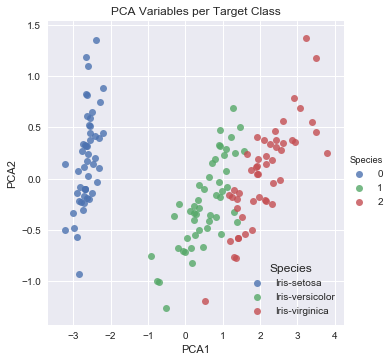

In [102]:
if (X.values.shape[1]==2):
    plot_of_data_space(dataset,X.values,y.values,input_headers)
else:
    pca(dataset,input_headers,target_header)

### Feature distributions

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
[0, 1, 2]


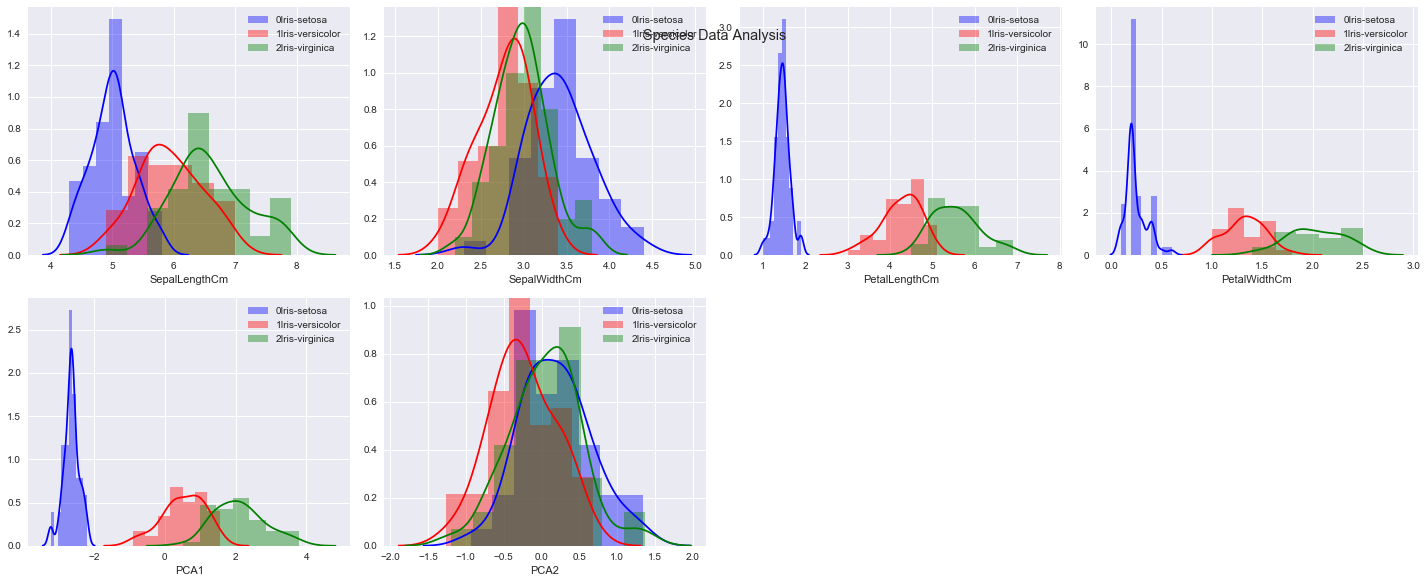

In [103]:
feature_distributions(dataset,target_header[0],classes)

In [104]:
    X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Correlation Matrix

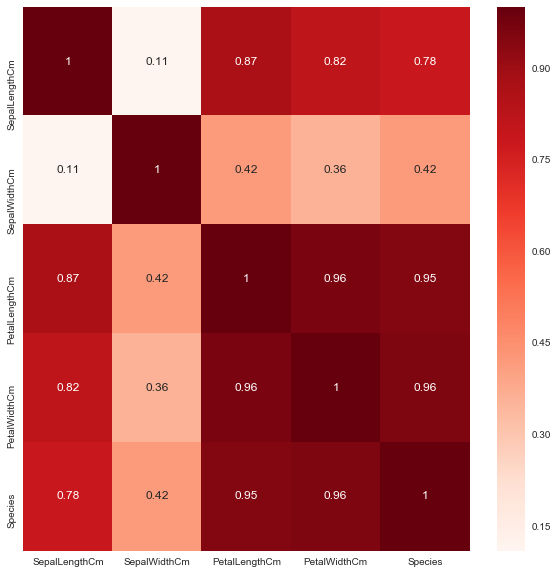

Correlations with respect to target:
Species          1.000000
PetalWidthCm     0.956464
PetalLengthCm    0.949043
SepalLengthCm    0.782561
SepalWidthCm     0.419446
Name: Species, dtype: float64

Recommended features to drop due to high correlation (greater than 0.7) to target variable:
['Species', 'PetalWidthCm', 'PetalLengthCm', 'SepalLengthCm']


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,0.109369,0.871754,0.817954,0.782561
SepalWidthCm,0.109369,1.000000,0.420516,0.356544,0.419446
PetalLengthCm,0.871754,0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,0.356544,0.962757,1.000000,0.956464
Species,0.782561,0.419446,0.949043,0.956464,1.000000


In [105]:
correlation_matrix(dataset,input_headers,target_header)

In [ ]:
corr_matrix 

In [106]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


## Splitting the Train-Test data

In [107]:
test_data_size=.20
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.20,random_state=42)

In [108]:
print(f'Xtrain sample count: {Xtrain.shape[0]}')
print(f'ytrain sample count: {ytrain.shape[0]}')
print(f'Xtest sample count: {Xtest.shape[0]}')
print(f'ytest sample count: {ytest.shape[0]}')

Xtrain sample count: 120
ytrain sample count: 120
Xtest sample count: 30
ytest sample count: 30


## Scale the data

In [109]:
#Scale the data    
Xtrain, Xtest=feature_scaling(Xtrain,Xtest)


StandardScaler(copy=True, with_mean=True, with_std=True)
[[-1.47393679  1.22037928 -1.5639872  -1.30948358]
 [-0.13307079  3.02001693 -1.27728011 -1.04292204]
 [ 1.08589829  0.09560575  0.38562104  0.28988568]
 [-1.23014297  0.77046987 -1.21993869 -1.30948358]
 [-1.7177306   0.32056046 -1.39196294 -1.30948358]]


In [110]:
ytest.head()

,Species
73,1
18,0
118,2
78,1
76,1


## Random Forest Model

In [111]:
# model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, 
#                                min_samples_split=2, min_samples_leaf=1, 
#                                min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
#                                min_impurity_decrease=0.0, min_impurity_split=None, 
#                                bootstrap=True, oob_score=False, n_jobs=None, random_state=0, 
#                                verbose=0, warm_start=False, class_weight=None)





In [112]:
model=RandomForestClassifier(n_estimators=100, criterion='gini',max_depth=None,
                             random_state=42)

### Fit model to training data

In [113]:
ytrain=ytrain.values.reshape(ytrain.size,)
model.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Model prediction on test data

In [114]:
y_model=model.predict(Xtest)
y_model

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [115]:
y_model_prob=model.predict_proba(Xtest)
y_model_prob[0:5]

array([[0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.04, 0.96],
       [0.  , 1.  , 0.  ],
       [0.  , 0.99, 0.01]])

### Model score & performance

In [116]:
accur=accuracy_score(ytest,y_model)
recall=recall_score(ytest, y_model,average=None)
precision=precision_score(ytest, y_model,average=None)
print(f'Model Accuracy:{accur:.2f}\n')

for i,k in enumerate (classes):
    print(f'{k} Recall:{recall[i]}\n')
    print(f'{k} Precision:{precision[i]}\n')

Model Accuracy:0.97

Iris-setosa Recall:1.0

Iris-setosa Precision:1.0

Iris-versicolor Recall:1.0

Iris-versicolor Precision:0.9

Iris-virginica Recall:0.9090909090909091

Iris-virginica Precision:1.0



#### Confusion Matrix

In [117]:
cm=confusion_matrix(ytest, y_model)

In [118]:
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

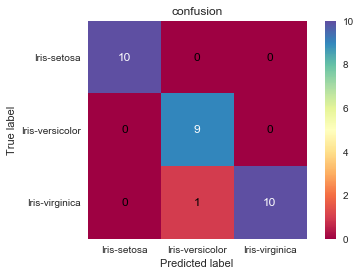

In [119]:
fig, ax = plt.subplots()
cmap=plt.cm.Spectral
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title="confusion",
       ylabel='True label',
       xlabel='Predicted label')



# Loop over data dimensions and create text annotations.
normalize=False
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()


plt.grid(b=None)
plt.show()

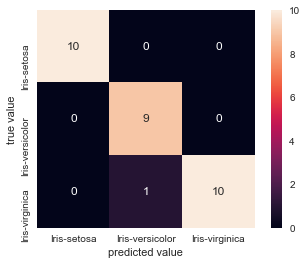

In [120]:
cm=pd.DataFrame(data=cm,columns=classes,index=classes)
sns.heatmap(cm,square=True,annot=True,cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

#### Cross Validation

Cross Validation Scores:
[0.93333333 0.9        0.9        0.93333333 0.93333333]

Mean Score:92.00%
Standard Deviation:0.02


C:\Users\Public\Programming\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


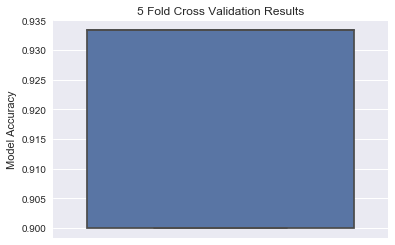

In [144]:
y=y.values.reshape(y.size,)   # reshape y to a 1-d array
k_fold=5
score=cross_val_score(model,X,y,cv=k_fold)
score.mean();
score.std();

print(f'Cross Validation Scores:\n{score}\n')
print(f'Mean Score:{score.mean()*100:.2f}%\nStandard Deviation:{score.std():.2f}')

sns.boxplot(x=score,orient='v')
plt.title(f'{k_fold} Fold Cross Validation Results')
plt.ylabel('Model Accuracy')
plt.show()

## Model with Principle Components as Input Variables (PCA1 &PCA2)

In [122]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,0,-2.684207,0.326607
1,4.9,3.0,1.4,0.2,0,-2.715391,-0.169557
2,4.7,3.2,1.3,0.2,0,-2.889820,-0.137346
3,4.6,3.1,1.5,0.2,0,-2.746437,-0.311124
4,5.0,3.6,1.4,0.2,0,-2.728593,0.333925


In [123]:
target_header=['Species']
input_headers=['PCA1','PCA2']

target_label=label_encoding(dataset,target_header)

# classes=target_label
test_label=label_encoding(dataset,input_headers)
#     print(test_label)

dataset=dataset[input_headers+target_header]
X,y=split_the_dataset(dataset,input_headers,target_header)
#     print(y.values)

In [124]:
X.head()

,PCA1,PCA2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


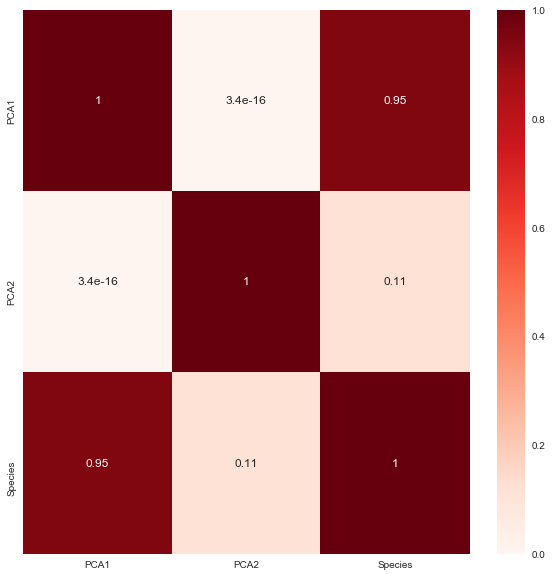

Correlations with respect to target:
Species    1.000000
PCA1       0.946535
PCA2       0.114026
Name: Species, dtype: float64

Recommended features to drop due to high correlation (greater than 0.7) to target variable:
['Species', 'PCA1']


,PCA1,PCA2,Species
PCA1,1.000000e+00,3.391738e-16,0.946535
PCA2,3.391738e-16,1.000000e+00,0.114026
Species,9.465354e-01,1.140260e-01,1.000000


In [125]:
correlation_matrix(dataset,input_headers,target_header)

In [126]:
test_data_size=.20
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.20)

In [127]:
#Scale the data    
Xtrain, Xtest=feature_scaling(Xtrain,Xtest)

StandardScaler(copy=True, with_mean=True, with_std=True)
[[ 0.71283832 -1.18055298]
 [-1.14899433  0.35710728]
 [ 1.5991426   2.70018851]
 [-1.19891007 -0.31109111]
 [-1.25980673 -0.41286373]]


In [128]:
model=RandomForestClassifier(n_estimators=100, criterion='gini',max_depth=None,
                             random_state=0)

In [129]:
ytrain=ytrain.values.reshape(ytrain.size,)
model.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [130]:
y_model=model.predict(Xtest)
y_model

array([1, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1,
       0, 0, 2, 1, 1, 0, 1, 2], dtype=int64)

In [131]:
accur=accuracy_score(ytest,y_model)
recall=recall_score(ytest, y_model,average=None)
precision=precision_score(ytest, y_model,average=None)
print (f'MODEL RESULTS WITH DATASET SPLIT AT {(1-test_data_size)*100:.1f}% TRAINING DATA AND {test_data_size*100:.1f}% TEST DATA\n')
print(f'Model Accuracy:{accur*100:.1f}%\n')

for i,k in enumerate (classes):
    print(f'{k} Recall:{recall[i]*100:.1f}%\n')
    print(f'{k} Precision:{precision[i]*100:.1f}%\n')

MODEL RESULTS WITH DATASET SPLIT AT 80.0% TRAINING DATA AND 20.0% TEST DATA

Model Accuracy:90.0%

Iris-setosa Recall:100.0%

Iris-setosa Precision:100.0%

Iris-versicolor Recall:100.0%

Iris-versicolor Precision:76.9%

Iris-virginica Recall:72.7%

Iris-virginica Precision:100.0%



In [132]:
cm=confusion_matrix(ytest, y_model)

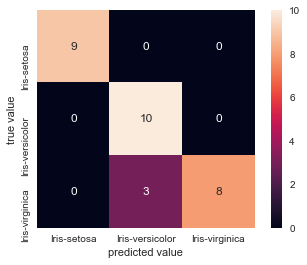

In [133]:
cm=pd.DataFrame(data=cm,columns=classes,index=classes)
sns.heatmap(cm,square=True,annot=True,cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

# EXTRA

In [137]:
cvs=pd.DataFrame(data=score)

In [138]:
cvs.columns.rename('Accuracy',inplace=True)

In [139]:
cvs

Accuracy,0
0,0.966667
1,0.966667
2,0.933333
3,0.966667
4,1.000000


In [140]:
dataset.head()

,PCA1,PCA2,Species
0,-2.684207,0.326607,0
1,-2.715391,-0.169557,0
2,-2.889820,-0.137346,0
3,-2.746437,-0.311124,0
4,-2.728593,0.333925,0


In [141]:
recall

array([1.        , 1.        , 0.72727273])

In [142]:
classes

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [143]:
accur=accuracy_score(ytest,y_model)
recall=recall_score(ytest, y_model,average=None)
precision=precision_score(ytest, y_model,average=None)
print (f'MODEL RESULTS WITH DATASET SPLIT AT {(1-test_data_size)*100:.1f}% TRAINING DATA AND {test_data_size*100:.1f}% TEST DATA\n')
print(f'Model Accuracy:{accur*100:.1f}%\n')

for i,k in enumerate (classes):
    print(f'{k} Recall:{recall[i]*100:.1f}%\n')
    print(f'{k} Precision:{precision[i]*100:.1f}%\n')
    



MODEL RESULTS WITH DATASET SPLIT AT 80.0% TRAINING DATA AND 20.0% TEST DATA

Model Accuracy:90.0%

Iris-setosa Recall:100.0%

Iris-setosa Precision:100.0%

Iris-versicolor Recall:100.0%

Iris-versicolor Precision:76.9%

Iris-virginica Recall:72.7%

Iris-virginica Precision:100.0%

